## Exploratory Data Analysis (EDA)

In [46]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
import os
import sys

# Get the path to the project root (one level up from the notebook)
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Add the project root to the system path
if project_root not in sys.path:
    sys.path.append(project_root)

In [48]:
from src.data_loader import DataLoader
from src.eda_preprocess import DataPreprocessor
from src.eda_pipeline import EDAPipeline

In [49]:
# 1. Load Data
loader = DataLoader('../data/raw/MachineLearningRating_v3.txt') 
df = loader.load_data()
df.head()

Data Loaded. Shape: (1000098, 52)


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


### Data Summarization:

In [58]:
# 2. Initialize EDA Pipeline
eda_raw = EDAPipeline(df)

In [ ]:
# 3. Data Summarization 
summary =  eda_raw.summarize_data()
missing_counts = summary['missing_values'] 
print("Missing Values:\n", missing_counts[missing_counts > 0])

Missing Values:
 Bank                        145961
AccountType                  40232
MaritalStatus                 8259
Gender                        9536
mmcode                         552
VehicleType                    552
make                           552
Model                          552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
bodytype                       552
NumberOfDoors                  552
VehicleIntroDate               552
CustomValueEstimate         779642
CapitalOutstanding               2
NewVehicle                  153295
WrittenOff                  641901
Rebuilt                     641901
Converted                   641901
CrossBorder                 999400
NumberOfVehiclesInFleet    1000098
dtype: int64


In [52]:
print("Data type of columns:\n", summary['dtypes'])

Data type of columns:
 UnderwrittenCoverID                  int64
PolicyID                             int64
TransactionMonth            datetime64[ns]
IsVATRegistered                       bool
Citizenship                         object
LegalType                           object
Title                               object
Language                            object
Bank                                object
AccountType                         object
MaritalStatus                       object
Gender                              object
Country                             object
Province                            object
PostalCode                           int64
MainCrestaZone                      object
SubCrestaZone                       object
ItemType                            object
mmcode                             float64
VehicleType                         object
RegistrationYear                     int64
make                                object
Model                          

In [53]:
print("Description of data:\n", summary['description'])

Description of data:
                               count                           mean  \
UnderwrittenCoverID       1000098.0                  104817.546075   
PolicyID                  1000098.0                     7956.68245   
TransactionMonth            1000098  2015-02-28 10:49:29.147423744   
PostalCode                1000098.0                    3020.600887   
mmcode                     999546.0                54877704.020474   
RegistrationYear          1000098.0                    2010.225371   
Cylinders                  999546.0                       4.046642   
cubiccapacity              999546.0                    2466.743258   
kilowatts                  999546.0                      97.207919   
NumberOfDoors              999546.0                        4.01925   
CustomValueEstimate        220456.0                  225531.129942   
NumberOfVehiclesInFleet         0.0                            NaN   
SumInsured                1000098.0                  604172.732589  

### Data Preprocessing 

In [70]:
#  Preprocess Data 
preprocessor = DataPreprocessor(df)
df_processed = preprocessor.run_pipeline()

Starting Data Preprocessing...


d:\DS_Courses\KAIM_10_Academy\KAIM_8\Week_3\KAIM_Week3\src\eda_preprocess.py:42: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  # Convert to integer, using -1 as a temporary placeholder for NaNs


Preprocessing Complete.


### Univariate Analysis:

In [71]:
eda = EDAPipeline(df_processed)

Distribution of Variables

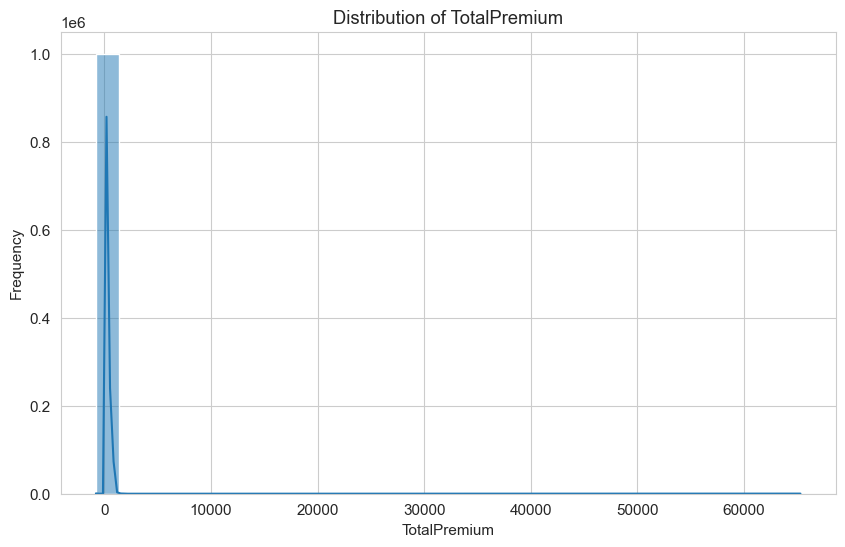

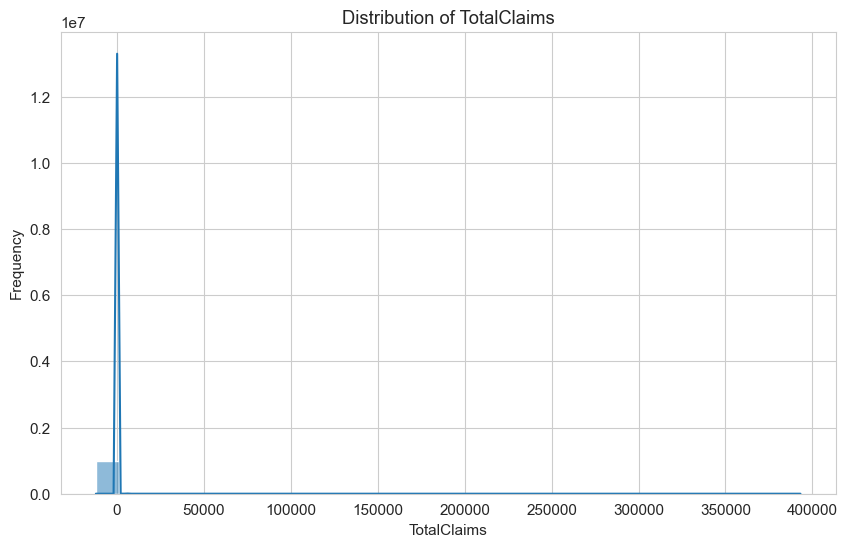

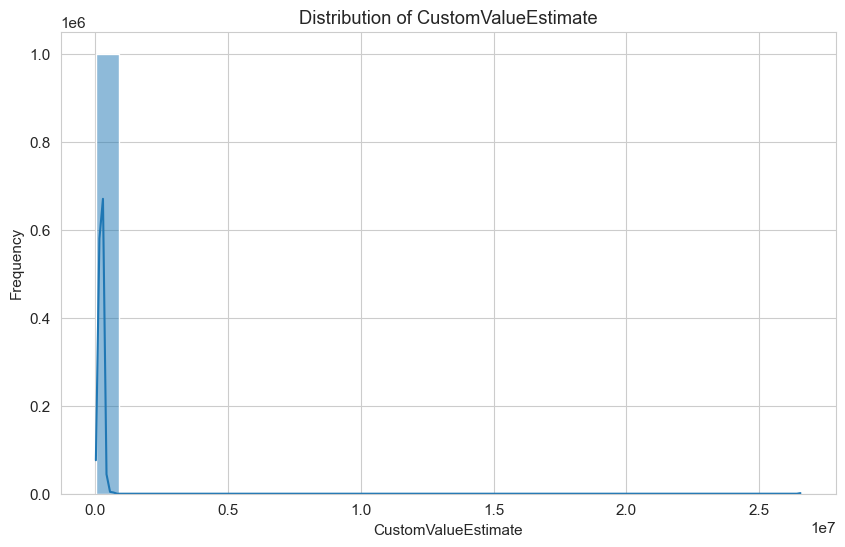

In [72]:
# Check numerical columns like TotalPremium, TotalClaims for distribution
eda.plot_distributions(
    numerical_cols=['TotalPremium', 'TotalClaims', 'CustomValueEstimate'], 
    categorical_cols=[]
)

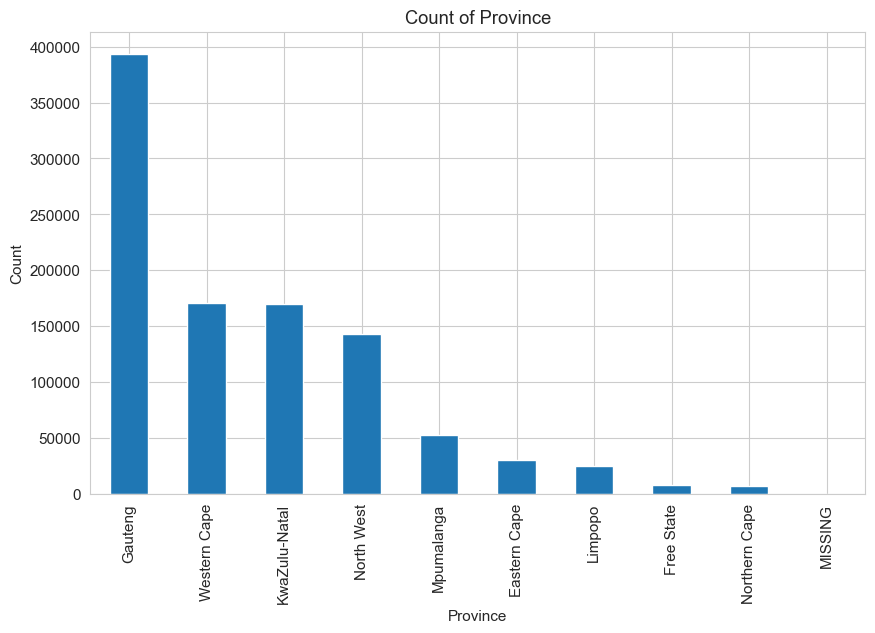

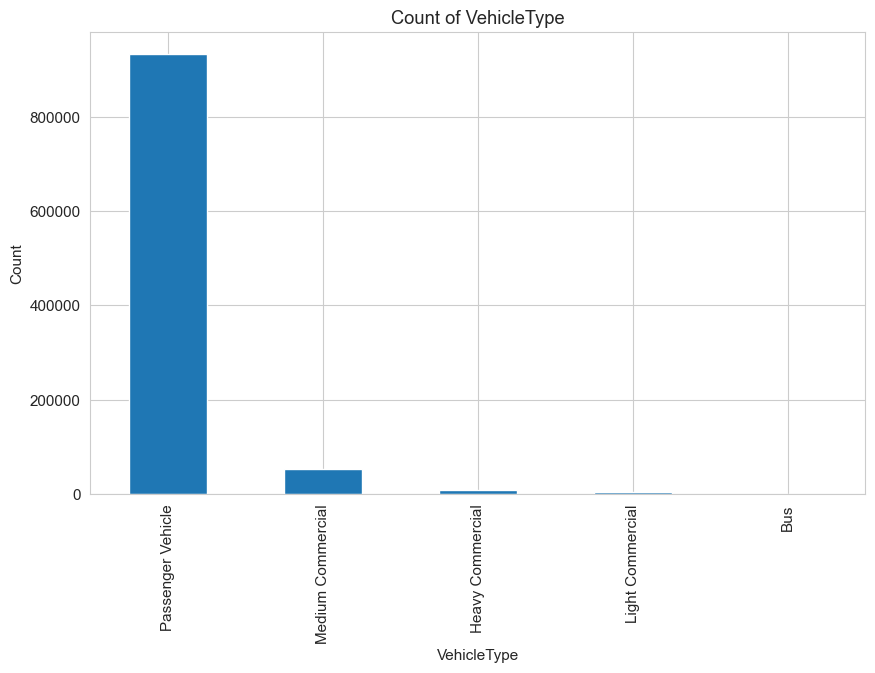

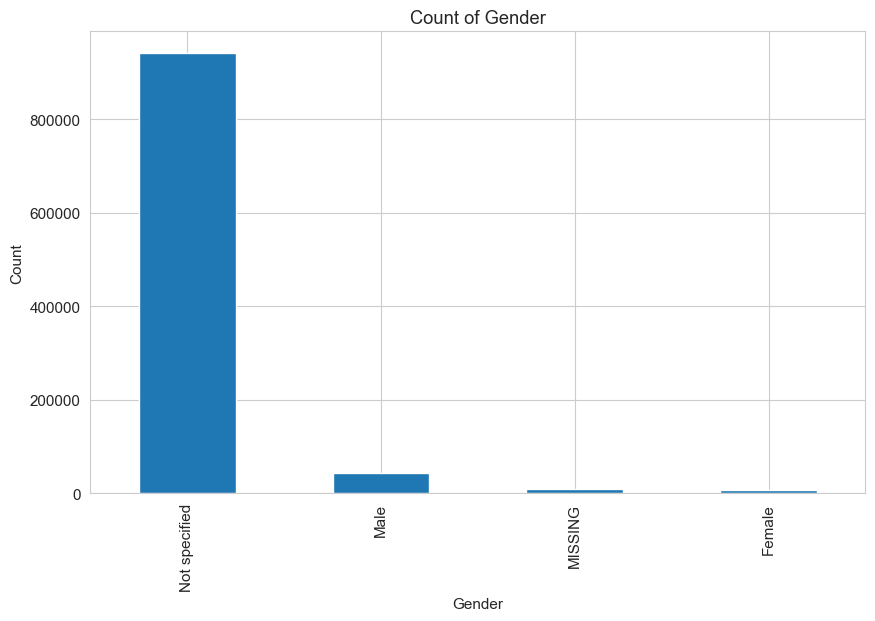

In [73]:
# Check categorical columns like Province, VehicleType for distribution
eda.plot_distributions(
    categorical_cols=['Province', 'VehicleType', 'Gender'],
    numerical_cols=[]
)

### Bivariate or Multivariate Analysis:

Correlations and Associations: 

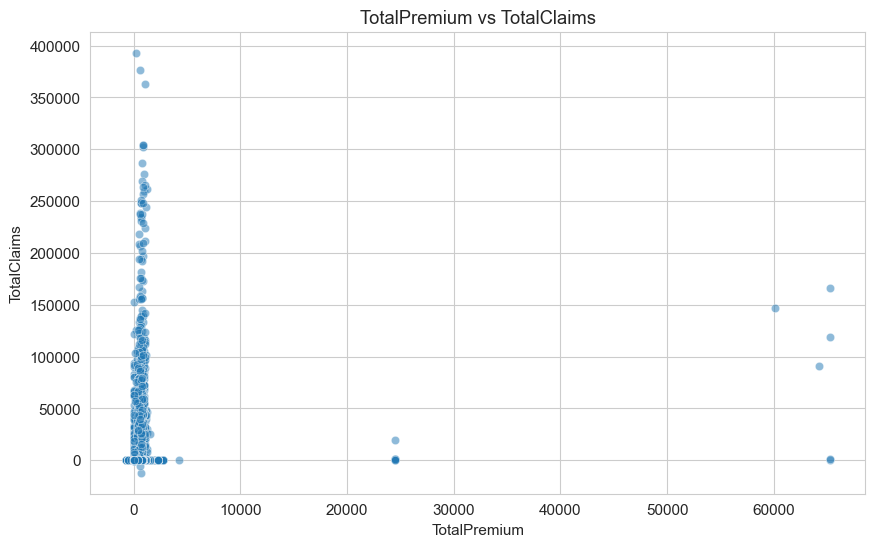

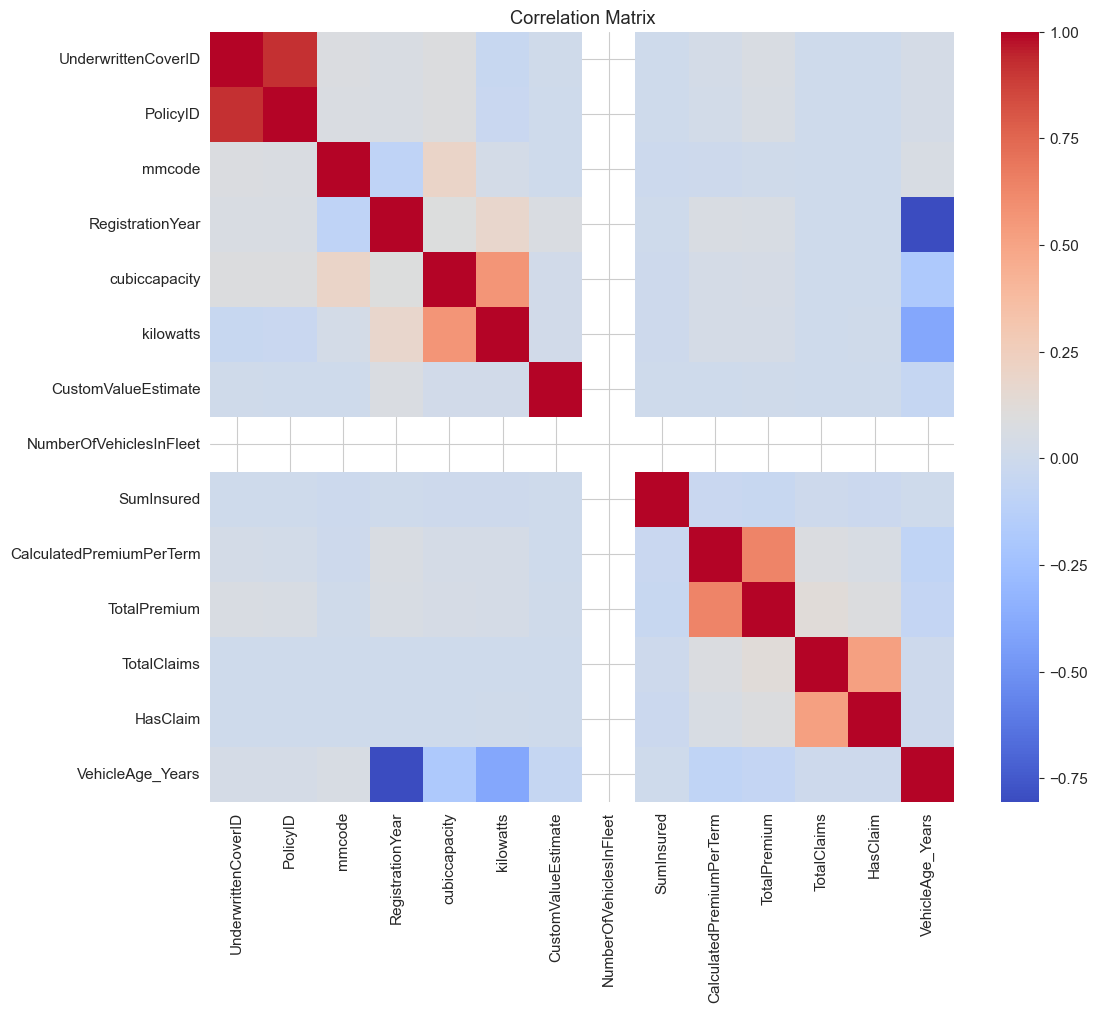


Correlation between Monthly Premium and Claims (Aggregated by ZipCode):
                       TotalPremium_Monthly  TotalClaims_Monthly
TotalPremium_Monthly              1.000000             0.974872
TotalClaims_Monthly               0.974872             1.000000


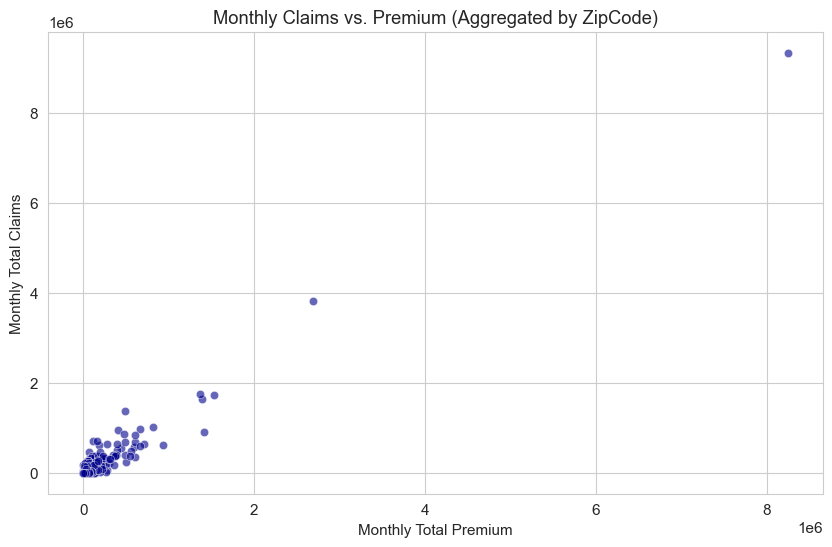

In [74]:
eda.bivariate_analysis()

### Data Comparison

Trends Over Geography:

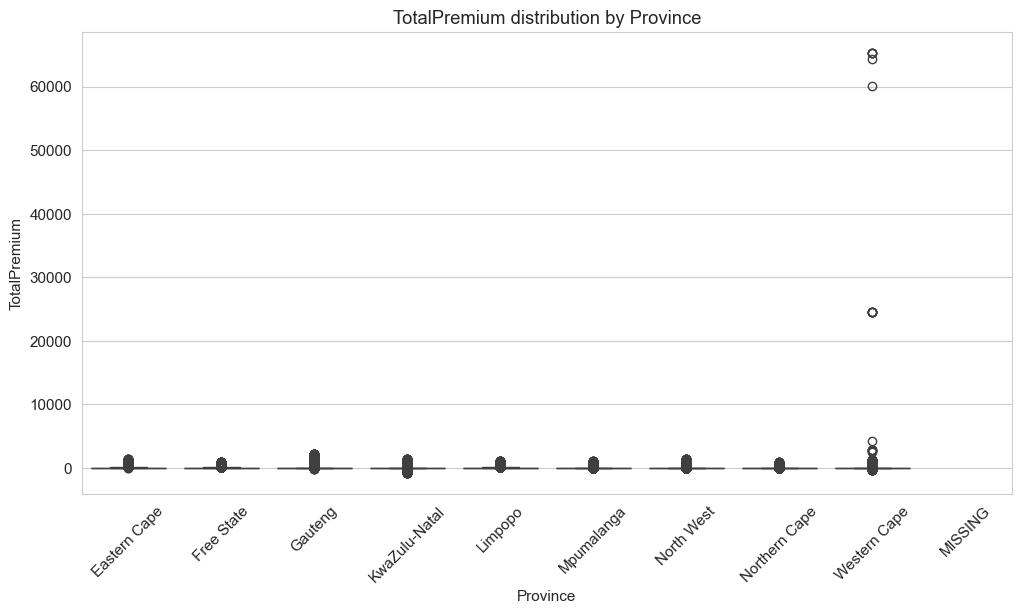

In [75]:
# 6. Data Comparison ( Trends Over Geography)
eda.compare_trends_over_geography(geo_col='Province', metric='TotalPremium')

### Guiding Questions

**Guiding Question 1: Portfolio Profitability (Loss Ratio)**

Question: What is the overall Loss Ratio (TotalClaims / TotalPremium) for the portfolio? How does it vary by Province, VehicleType, and Gender?

In [76]:
eda.loss_ratio()

Sum of Totalclaim : 64867546.17070176
Sum of TotalPremium : 61911562.69643225
Loss Ratio = 1.0477452570332206


Insight : Loss Ratio = 1.05. Since the overall LR is greater than 1.0 (or 100%), the portfolio is unprofitable.

Visualization of Segmented Loss Ratio

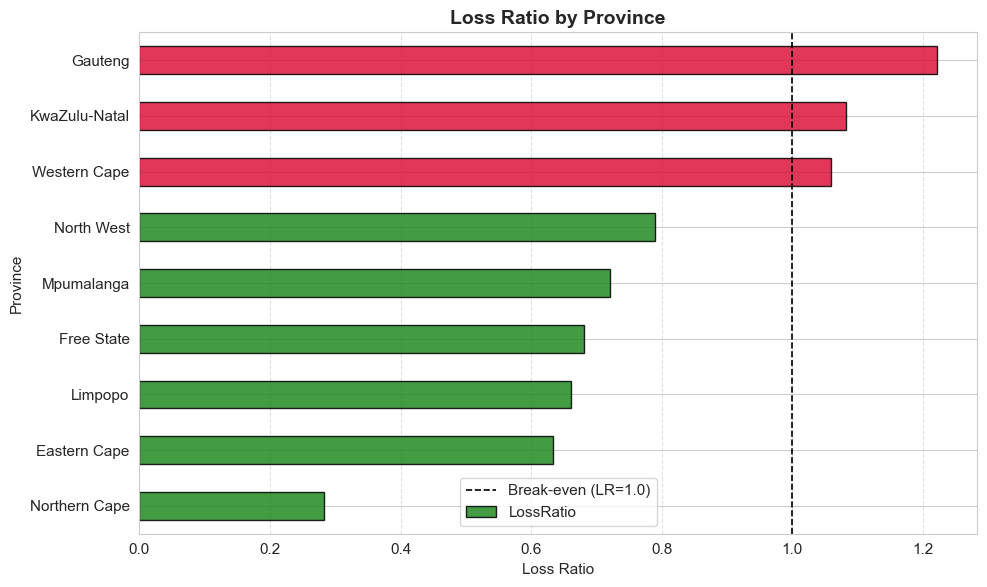

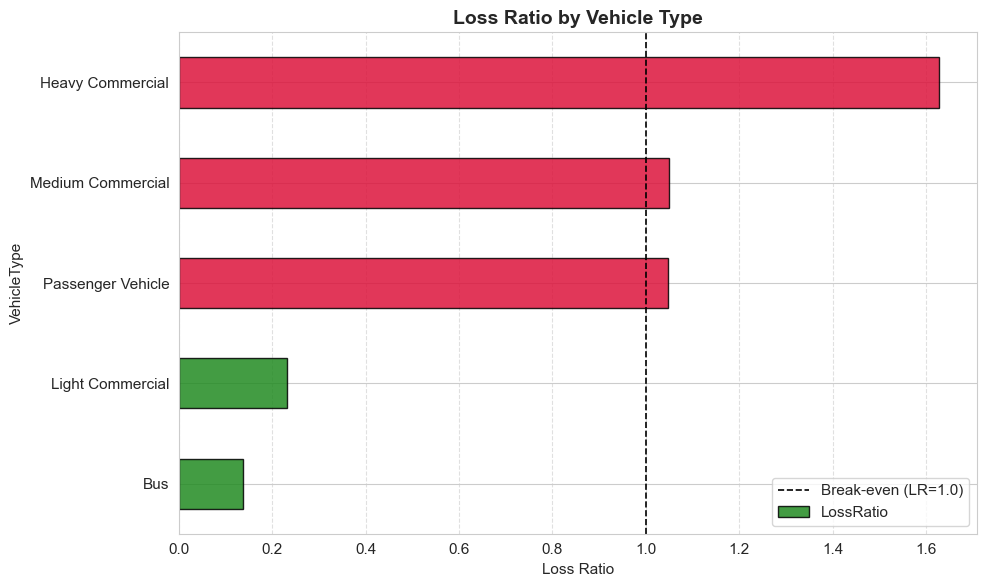

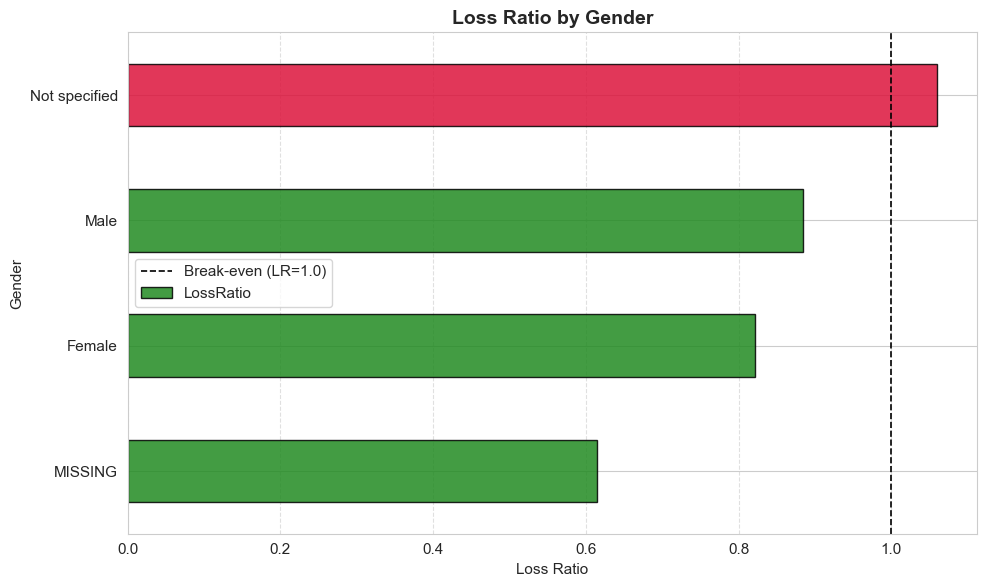

In [77]:
eda.visuaize_loss_ratio()

**Insights**

Gauteng is the highest-risk province (LR = ~1.22), while Northern Cape is the lowest-risk (LR = ~0.28).

Heavy Commercial vehicles are the riskiest (LR = ~1.60), while Bus and Light Commercial are the safest (LR < 0.30).



**Guiding Question 2: Data Distribution and Outliers**

Question: What are the distributions of key financial variables? 

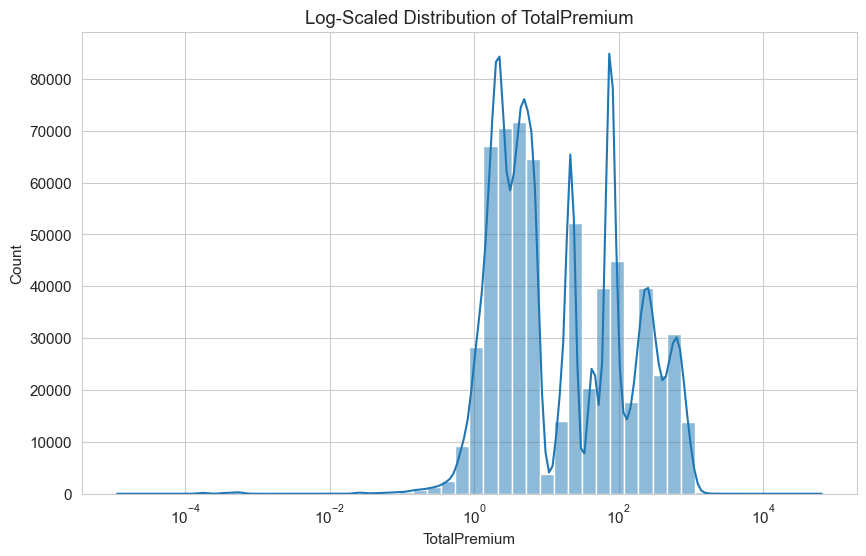

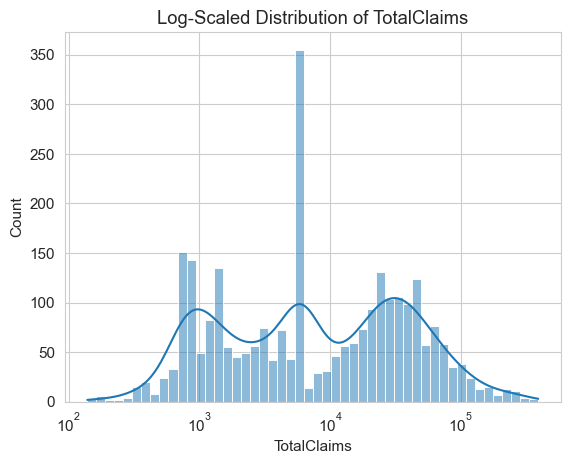

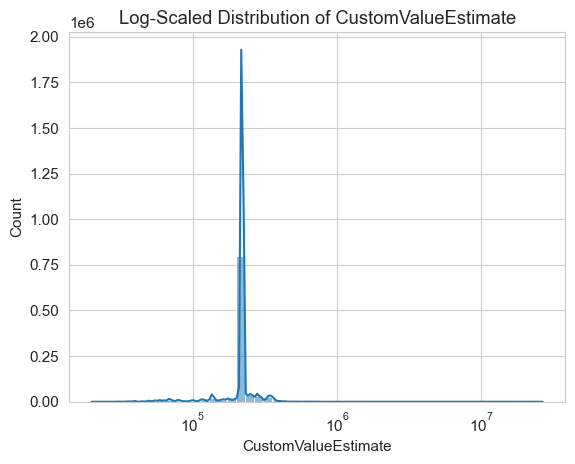

In [65]:
eda.plot_log_scaled_distributions( numerical_cols=['TotalPremium', 'TotalClaims','CustomValueEstimate'])

**Statistical Insight** Right-skewness indicates that the mean is being pulled up by the extreme high values, making the median a more robust measure of central tendency than the mean for these variables.

####  Note on Data Transformation for Modeling 

The distributions of **`TotalPremium`** and **`SumInsured`** show significant **right-skewness** and a high concentration of values near zero. This is typical for financial insurance data.

To meet the assumptions of many generalized linear models (GLMs), and to improve model performance by reducing the impact of extreme outliers, these variables must be transformed. 

**Action for Statistical Modeling:**
* Before training any predictive models, apply a **logarithmic transformation** (specifically, `np.log1p()`) to both `TotalPremium` and `SumInsured`. This function handles zeros correctly and is ideal for normalizing highly skewed financial data.utions of **`TotalPremium`** and **`SumInsured`** show significant **right-skewness** and a high concentration of values near zero. This is typical for financial insurance data.



Are there outliers in TotalClaims or CustomValueEstimate that could skew our analysis?

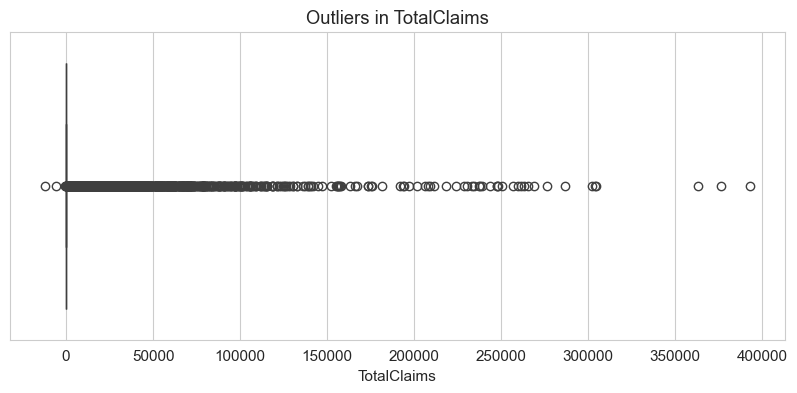

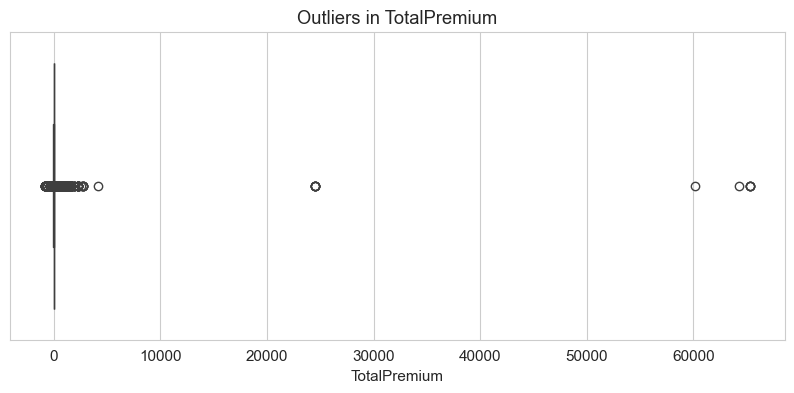

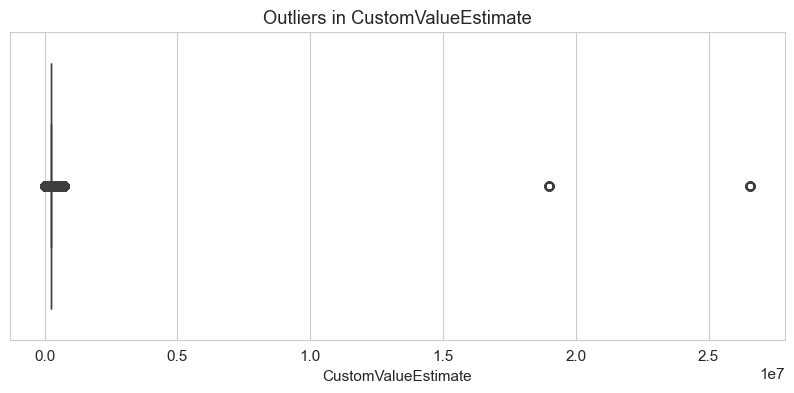

In [66]:
eda.detect_outliers(cols=['TotalClaims', 'TotalPremium', 'CustomValueEstimate'])

**Guiding Question 3: Temporal Trends**

Question: Are there temporal trends? Did the claim frequency or severity change over the 18-month period?

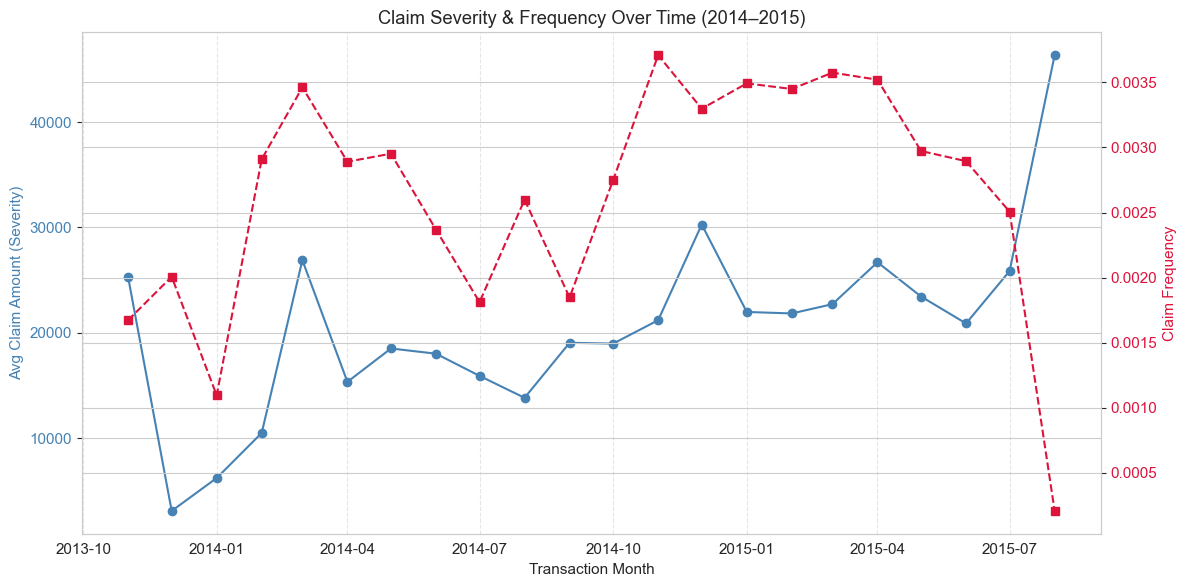

Trend Insight: Severity ↑ increasing, Frequency ↑ increasing over time.


In [67]:
eda.temporal_trends()

Insight Check: increasing severity suggests rising repair or replacement costs over time, which requires pricing adjustments.

**Guiding Question 4: Vehicle Specific Risk**

Question: Which vehicle makes/models are associated with the highest and lowest claim amounts?


Top 10 Vehicle Models by HIGHEST Average Claim Amount:
                                   Model  AvgClaimAmount  ClaimCount
59   CRAFTER 50 2.0 TDi HR 80KW F/C P/V    76660.915526          10
80                        IBHUBEZI 2.2i    38239.744691          19
125            SPRINTER 519 CDi F/C P/V    36423.821175          10
10                   50 C15V 15 F/C P/V    35736.884921          21
23                          AMANDLA 2.2    32529.616858          34
99       QUANTUM 2.5 D-4D SESFIKILE 16s    29072.315308         266
115    SPRINTER 416 CDI HI-ROOF F/C P/V    28710.750337          26
27                        AVANZA 1.5 SX    27943.194908          39
82                              INYATHI    27261.037429          23
17            A4 2.0 TDI S  MULTITRONIC    26316.351526          10

Top 10 Vehicle Models by LOWEST Average Claim Amount:
                               Model  AvgClaimAmount  ClaimCount
124     SPRINTER 519 CDi DC F/C C/C     7296.195614          10
127        

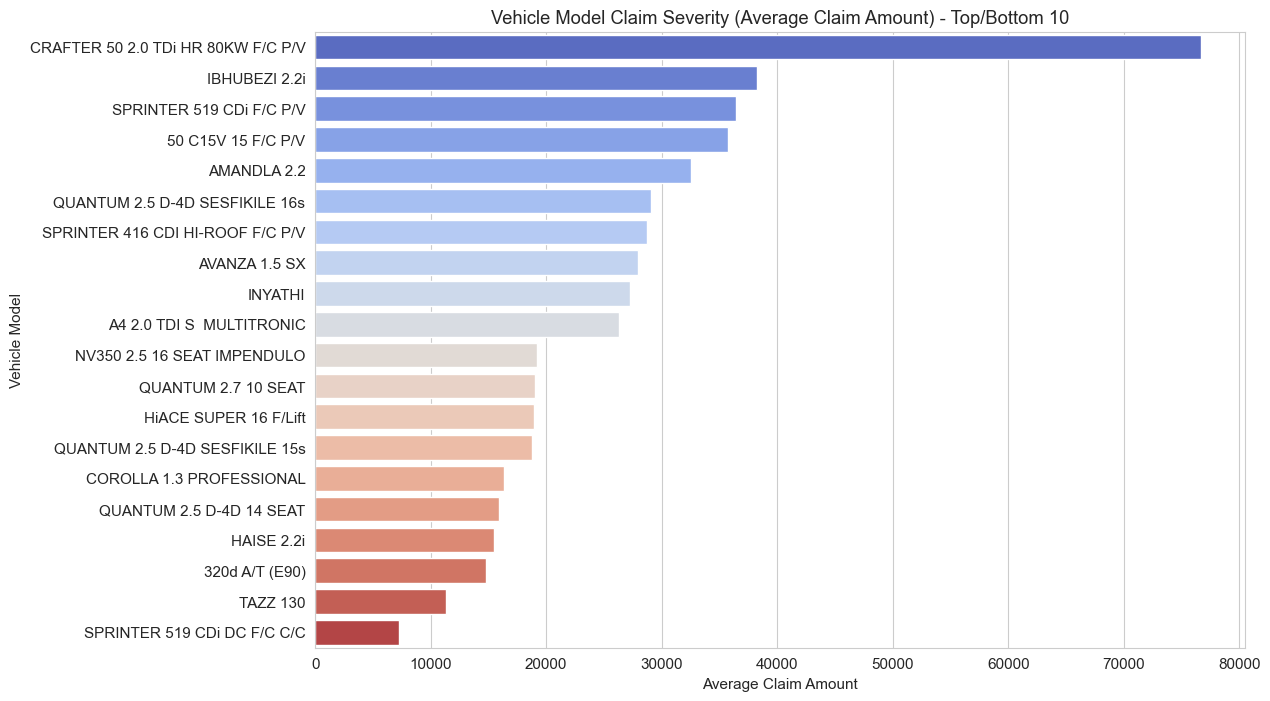

In [68]:
eda.vehicle_claim_amounts(top_n=10)